# Image processing for Code Segmentation


In [3]:
import os
from IPython.display import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

%matplotlib inline

## Example image to be processed


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

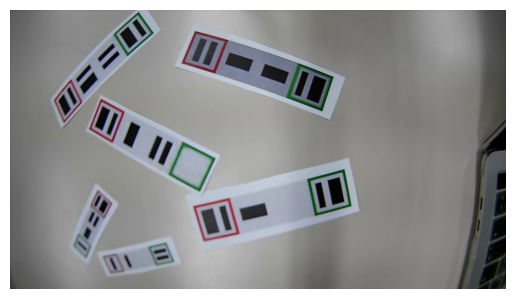

In [4]:
# Load the image
image = cv2.imread("mix_G1_64.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
plt.axis('off')


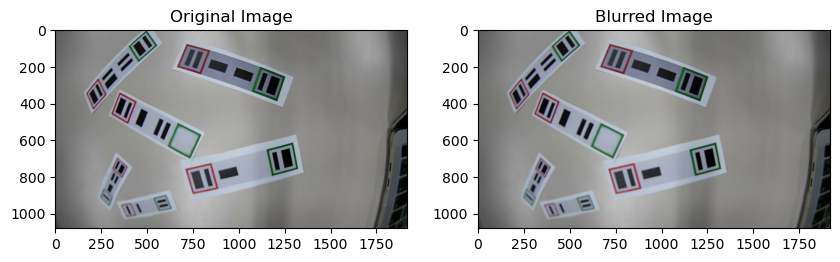

In [5]:
# Blur the image
image_blurred = cv2.GaussianBlur(image, (7,7), 0)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.title('Original Image'); plt.imshow(image)
plt.subplot(1, 2, 2); plt.title('Blurred Image'); plt.imshow(image_blurred)

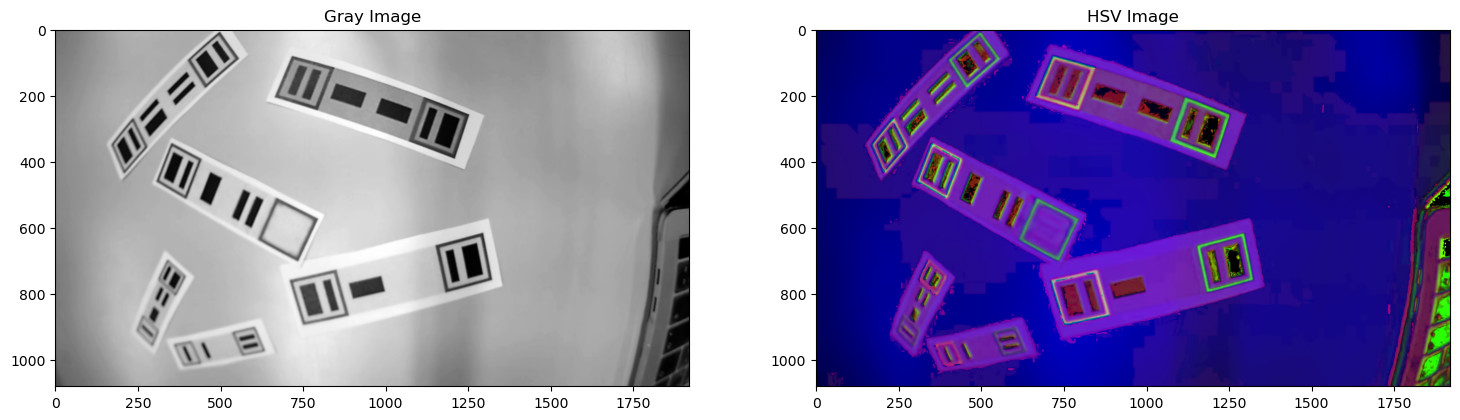

In [6]:
# Convert the image to grayscale and hsv
gray = cv2.cvtColor(image_blurred, cv2.COLOR_RGB2GRAY)
hsv = cv2.cvtColor(image_blurred, cv2.COLOR_RGB2HSV)

# Print images 
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1) ; plt.title('Gray Image') ; plt.imshow(gray, cmap='gray')
plt.subplot(1, 2, 2) ; plt.title('HSV Image') ; plt.imshow(hsv)

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

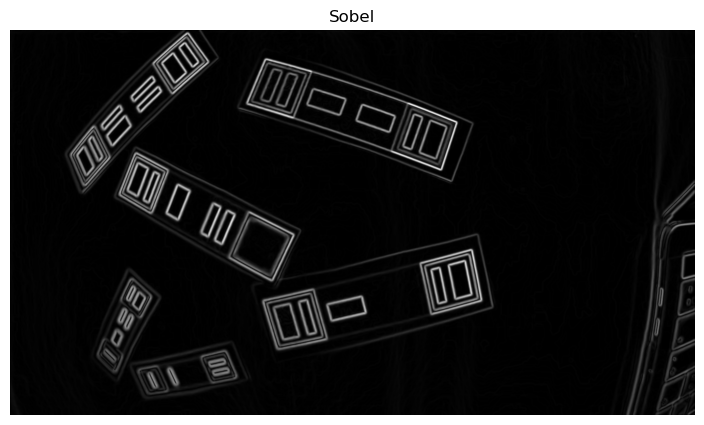

In [7]:
# Sobel filter the image.
## Apply the Sobel filter to the image. The Sobel filter is used to find the edges in an image.

img_rgb_sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=11) # ksize is the kernel size
img_rgb_sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=11) 
img_rgb_sobel = np.sqrt(img_rgb_sobel_x**2 + img_rgb_sobel_y**2)
img_rgb_sobel = cv2.normalize(img_rgb_sobel, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Display the sobel image
plt.figure(figsize=[18, 5])
plt.imshow(img_rgb_sobel, cmap='gray'), plt.title('Sobel') ; plt.axis('off')

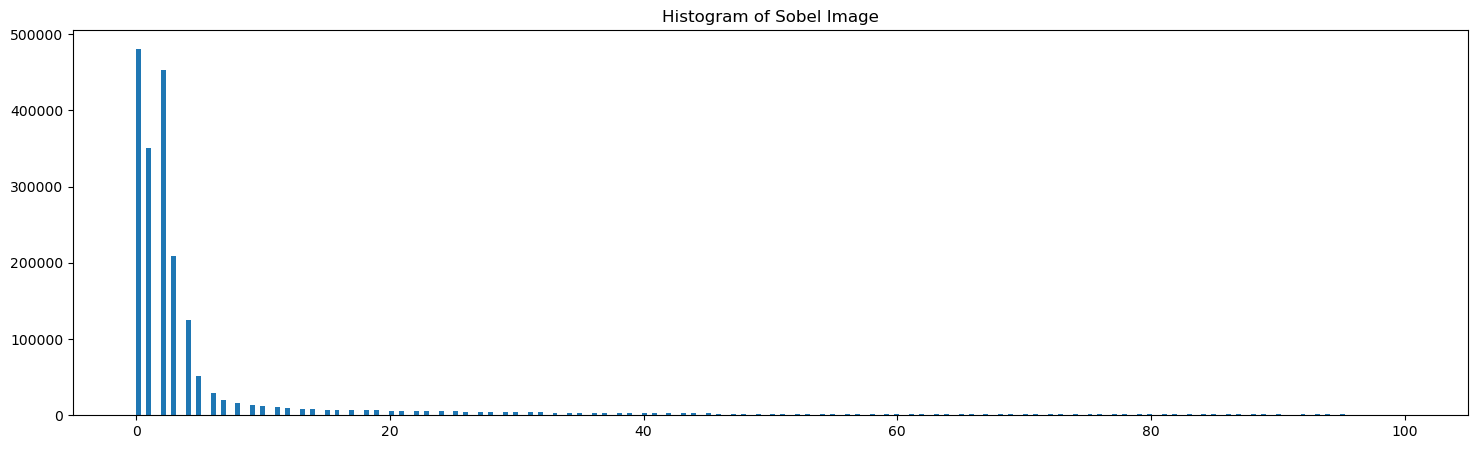

In [8]:
# Histogram of the sobel image
plt.figure(figsize=[18, 5])
plt.hist(img_rgb_sobel.ravel(), 256, [0, 100]) ; plt.title('Histogram of Sobel Image') ; plt.show()

(<matplotlib.image.AxesImage at 0x1bba8c00bc0>, Text(0.5, 1.0, 'Threshold'))

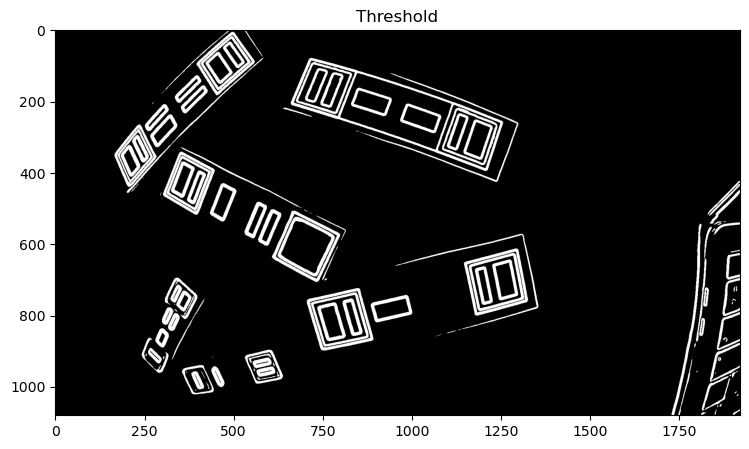

In [9]:
# Adaptative Threshold the image
## Threshold the image to create a binary image. This binary image will be used to create a mask.
# Adaptive threshold the image.
ret, img_rgb_thresh = cv2.threshold(img_rgb_sobel, 40, 255, cv2.THRESH_BINARY)

# Display the image with the adaptive threshold applied.
plt.figure(figsize=[18, 5])
plt.imshow(img_rgb_thresh, cmap='gray'), plt.title('Threshold')


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

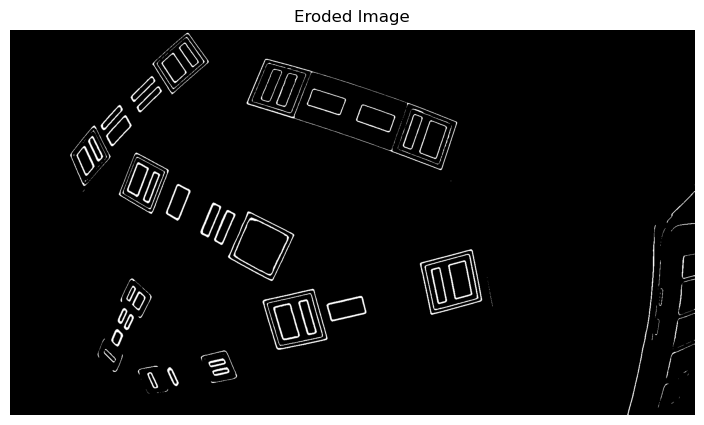

In [10]:
# Erode the image

kernel = np.ones((5,5), np.uint8)
img_rgb_erode = cv2.erode(img_rgb_thresh, kernel, iterations=1) 

# Display the eroded image
plt.figure(figsize=[18, 5])
plt.imshow(img_rgb_erode, cmap='gray'), plt.title('Eroded Image') ; plt.axis('off')


Number of contours found =  315


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

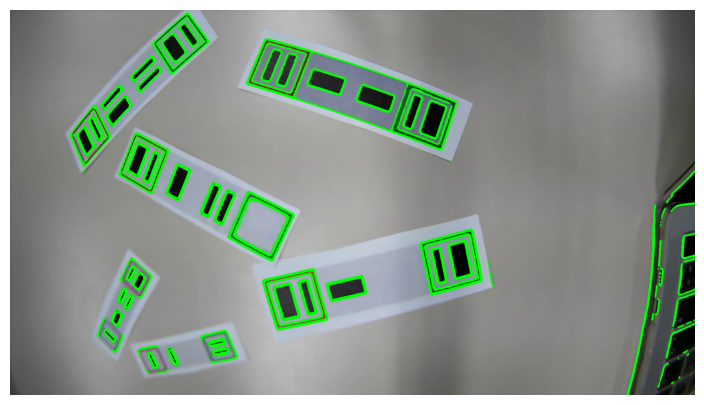

In [11]:
##Find the contours in the image

contours, hierarchy = cv2.findContours(img_rgb_erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Number of contours
print('Number of contours found = ', len(contours))

# Draw the contours on the image
image_copy = np.copy(image)
cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 3)

# Display the image with the contours
plt.figure(figsize=[18, 5])
plt.imshow(image_copy) ; plt.axis('off')


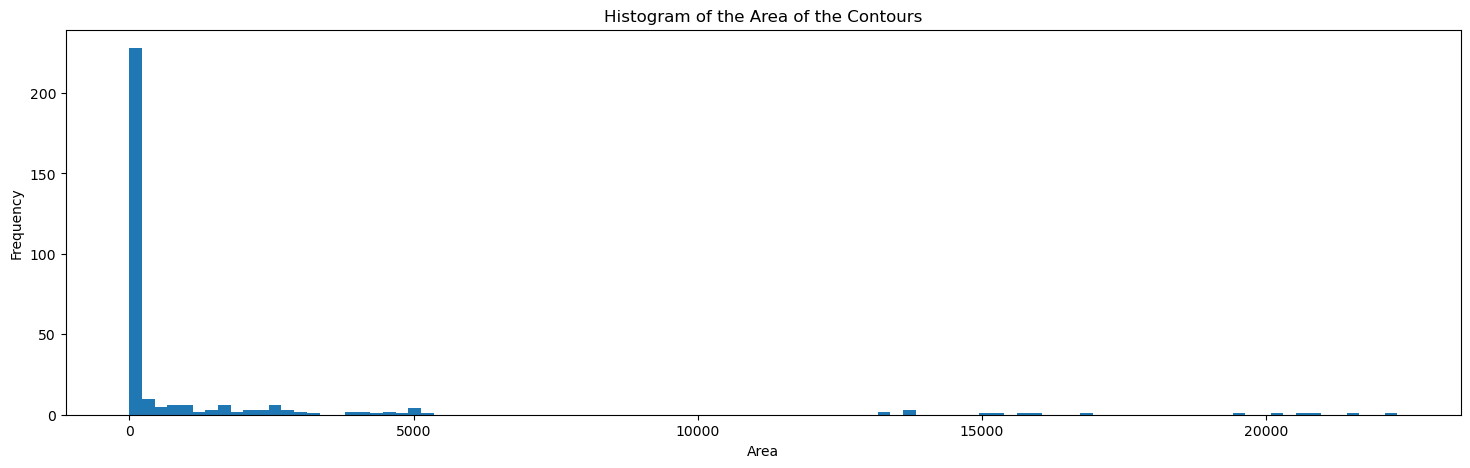

In [12]:
# Histogram of the area of the contours
areas = []
for contour in contours:
    area = cv2.contourArea(contour)
    areas.append(area)

plt.figure(figsize=[18, 5])
plt.hist(areas, bins=100) ; plt.title('Histogram of the Area of the Contours')
plt.xlabel('Area') ; plt.ylabel('Frequency'); plt.show()


Number of filtered contours =  57


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

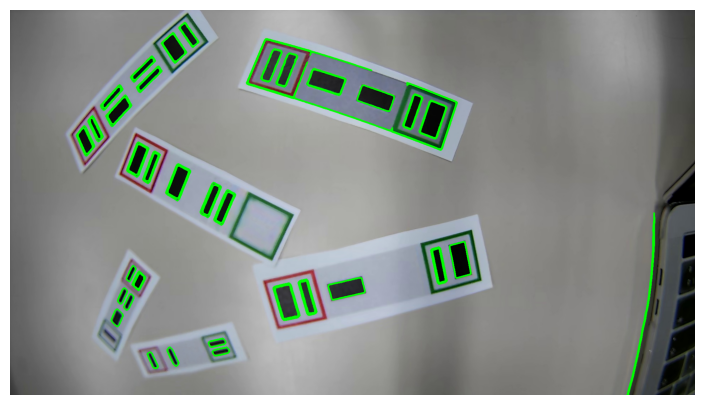

In [13]:
# Filter the contours by area
filtered_contours = []
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 500 and area < 5000:
        filtered_contours.append(contour)

# Number of filtered contours
print('Number of filtered contours = ', len(filtered_contours))

# Draw the filtered contours on the image
image_copy = np.copy(image)
cv2.drawContours(image_copy, filtered_contours, -1, (0, 255, 0), 3)

# Display the image with the filtered contours
plt.figure(figsize=[18, 5])
plt.imshow(image_copy) ; plt.axis('off')



(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

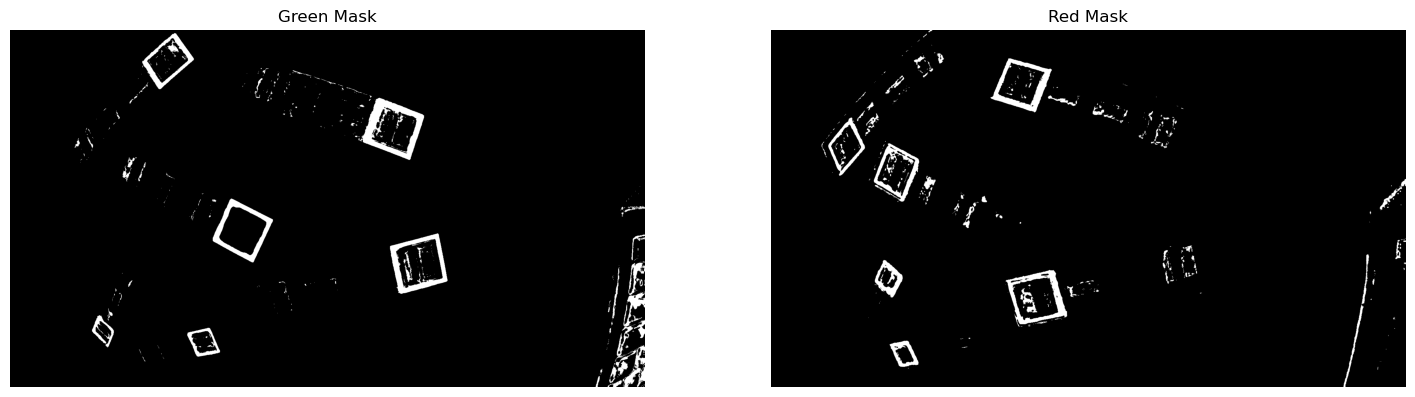

In [14]:
# Apply the hsv mask to the image. 
# Best configuration for detecting red squares in the image mix_G1_64.jpg
# H = 120, S = 20, V = 0, H1 = 179, S1 = 255, V1 = 255
# Best configuration for detecting green squares in the image mix_G1_64.jpg
# H = 50, S = 40, V = 0, H1 = 110, S1 = 255, V1 = 130

lower_red = np.array([120, 20, 0])
upper_red = np.array([179, 255, 255])
lower_green = np.array([50, 40, 0])
upper_green = np.array([110, 255, 160])
mask_red = cv2.inRange(hsv, lower_red, upper_red)
mask_green = cv2.inRange(hsv, lower_green, upper_green)

# Display the masks
plt.figure(figsize=[18, 5])
plt.subplot(1, 2, 1) ; plt.imshow(mask_green, cmap='gray') ; plt.title('Green Mask') ; plt.axis('off')
plt.subplot(1, 2, 2) ; plt.imshow(mask_red, cmap='gray') ; plt.title('Red Mask') ; plt.axis('off')

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

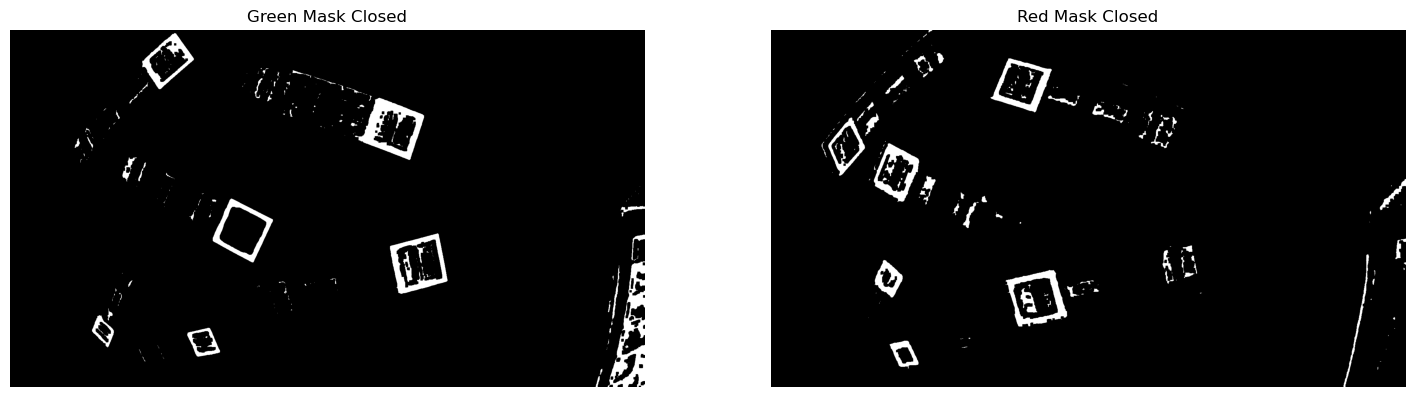

In [15]:
# Apply apperture and close the mask
kernel = np.ones((7,7), np.uint8)   
mask_red_closed = cv2.morphologyEx(mask_red, cv2.MORPH_CLOSE, kernel)
mask_green_closed = cv2.morphologyEx(mask_green, cv2.MORPH_CLOSE, kernel)

# Display the closed masks
plt.figure(figsize=[18, 5])
plt.subplot(1, 2, 1) ; plt.imshow(mask_green_closed, cmap='gray') ; plt.title('Green Mask Closed') ; plt.axis('off')
plt.subplot(1, 2, 2) ; plt.imshow(mask_red_closed, cmap='gray') ; plt.title('Red Mask Closed') ; plt.axis('off')

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

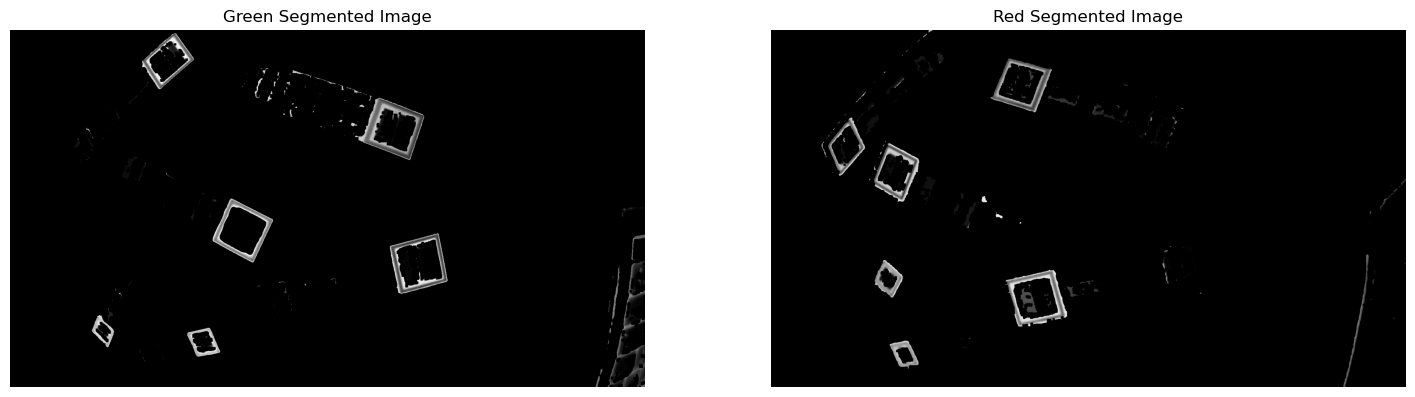

In [16]:
# Aplicar las máscaras a la imagen en escala de grises
segmented_red = cv2.bitwise_and(gray, gray, mask=mask_red_closed)
segmented_green = cv2.bitwise_and(gray, gray, mask=mask_green_closed)

# Display the segmented images
plt.figure(figsize=[18, 5])
plt.subplot(1, 2, 1) ; plt.imshow(segmented_green, cmap='gray') ; plt.title('Green Segmented Image') ; plt.axis('off')
plt.subplot(1, 2, 2) ; plt.imshow(segmented_red, cmap='gray') ; plt.title('Red Segmented Image') ; plt.axis('off')

(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

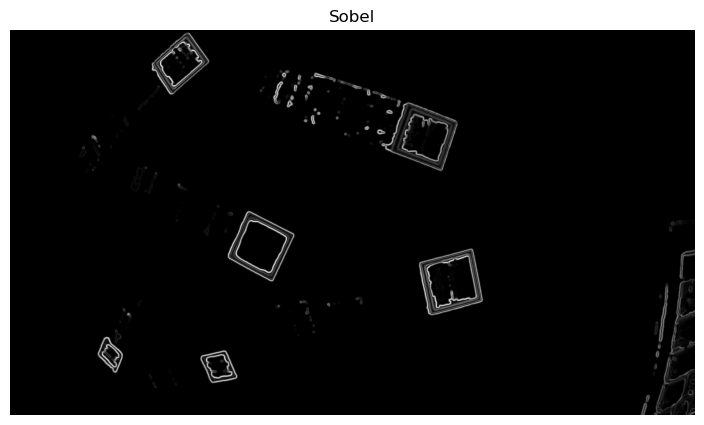

In [17]:
# Sobel filter the image.
## Apply the Sobel filter to the image. The Sobel filter is used to find the edges in an image.

img_rgb_sobel_x = cv2.Sobel(segmented_green, cv2.CV_64F, 1, 0, ksize=11) # ksize is the kernel size
img_rgb_sobel_y = cv2.Sobel(segmented_green, cv2.CV_64F, 0, 1, ksize=11) 
img_rgb_sobel = np.sqrt(img_rgb_sobel_x**2 + img_rgb_sobel_y**2)
img_rgb_sobel = cv2.normalize(img_rgb_sobel, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Display the sobel image
plt.figure(figsize=[18, 5])
plt.imshow(img_rgb_sobel, cmap='gray'), plt.title('Sobel') ; plt.axis('off')

Number of contours found =  100
Number of filtered contours =  6


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

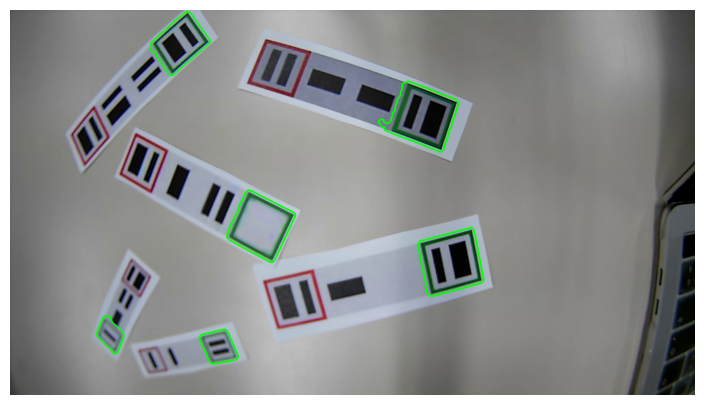

In [18]:
# Find the contours in the segmented images
contours, _ = cv2.findContours(img_rgb_sobel, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Number of contours
print('Number of contours found = ', len(contours))

# Filter the contours by aspect ratio and area
filtered_contours = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / h
    area = cv2.contourArea(contour)
    if area > 1500 and aspect_ratio > 0.7 and aspect_ratio < 1.3:
        filtered_contours.append(contour)

# Number of filtered contours
print('Number of filtered contours = ', len(filtered_contours))

## Prin the filtered contours
image_copy = np.copy(image)
cv2.drawContours(image_copy, filtered_contours, -1, (0, 255, 0), 3)

# Display the image with the filtered contours
plt.figure(figsize=[18, 5])
plt.imshow(image_copy) ; plt.axis('off')


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

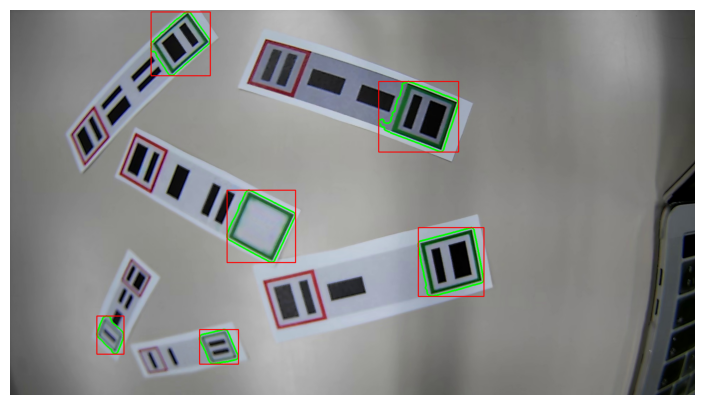

In [19]:
## Find the bounding boxes of the filtered contours
contours_filtered = []
for contour in filtered_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image_copy, (x, y), (x+w, y+h), (255, 0, 0), 2)
    contours_filtered.append(contour)

# Display the image with the bounding boxes
plt.figure(figsize=[18, 5])
plt.imshow(image_copy) ; plt.axis('off')


Center =  (584, 944) Height =  97 Width =  109 Mean =  103.0
Center =  (281, 910) Height =  107 Width =  76 Mean =  91.5
Center =  (1235, 706) Height =  193 Width =  184 Mean =  188.5
Center =  (702, 605) Height =  203 Width =  192 Mean =  197.5
Center =  (1156, 298) Height =  198 Width =  224 Mean =  211.0
Center =  (475, 92) Height =  179 Width =  166 Mean =  172.5


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

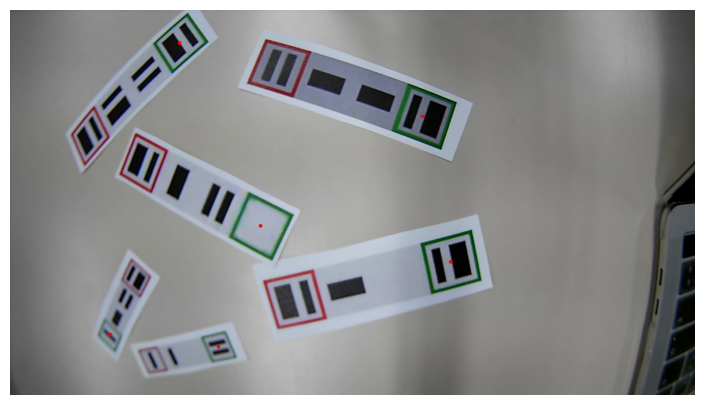

In [20]:
# Extract the center and the mean of the height and width of the contours
centers = []
heights = []
widths = []
for contour in filtered_contours:
    M = cv2.moments(contour)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    centers.append((cX, cY))
    x, y, w, h = cv2.boundingRect(contour)
    heights.append(h)
    widths.append(w)
    # Mean between the height and the width
    mean = (h + w) / 2
    print('Center = ', (cX, cY), 'Height = ', h, 'Width = ', w, 'Mean = ', mean)

# Display the centers
image_copy = np.copy(image)
for center in centers:
    cv2.circle(image_copy, center, 5, (255, 0, 0), -1)

plt.figure(figsize=[18, 5])
plt.imshow(image_copy) ; plt.axis('off')